In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import utilities as u
import preprocessing as pp
import single_session_plots as ssp
import numpy as np
import SimilarityMatrixAnalysis as sm
import PlaceCellAnalysis as pc
import scipy as sp
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])



G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [54]:
ops = {'behavior':True,
    'PCA':False,
    'place cells':True,
    'trial simmats':True,
    'trial NMF':False,
    'realtime lar':True,
    'savefigs':True}

In [75]:
mouse = '4222193.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

MouseName  DateFolder  SessionNumber              Track  RewardCount  \
2647  4222193.3  04_10_2019              2  TwoTower_foraging          100   
2658  4222193.3  07_10_2019              2  TwoTower_foraging          100   
2667  4222193.3  09_10_2019              3  TwoTower_foraging          100   
2677  4222193.3  11_10_2019              4  TwoTower_foraging          100   
2693  4222193.3  14_10_2019              7  TwoTower_foraging          100   
2719  4222193.3  15_10_2019              3  TwoTower_foraging          100   
2733  4222193.3  16_10_2019              4  TwoTower_foraging           96   
2751  4222193.3  17_10_2019              4  TwoTower_foraging          100   
2764  4222193.3  18_10_2019              6  TwoTower_foraging          100   
2776  4222193.3  19_10_2019              7  TwoTower_foraging          100   

      Imaging ImagingRegion   DateTime  \
2647        1            DG 2019-10-04   
2658        1            DG 2019-10-07   
2667        1            DG 2019-10-09   
2677        1            DG 2019-10-11   
2693        1            DG 2019-10-14   
2719        1            DG 2019-10-15   
2733        1            DG 2019-10-16   
2751        1            DG 2019-10-17   
2764        1            DG 2019-10-18   
2776        1            DG 2019-10-19   

                                              data file scanfile  \
2647  G:\My Drive\VR_Data\TwoTower\4222193.3\04_10_2...     None   
2658  G:\My Drive\VR_Data\TwoTower\4222193.3\07_10_2...     None   
2667  G:\My Drive\VR_Data\TwoTower\4222193.3\09_10_2...     None   
2677  G:\My Drive\VR_Data\TwoTower\4222193.3\11_10_2...     None   
2693  G:\My Drive\VR_Data\TwoTower\4222193.3\14_10_2...     None   
2719  G:\My Drive\VR_Data\TwoTower\4222193.3\15_10_2...     None   
2733  G:\My Drive\VR_Data\TwoTower\4222193.3\16_10_2...     None   
2751  G:\My Drive\VR_Data\TwoTower\4222193.3\17_10_2...     None   
2764  G:\My Drive\VR_Data\TwoTower\4222193.3\18_10_2...     None   
2776  G:\My Drive\VR_Data\TwoTower\4222193.3\19_10_2...     None   

                                                scanmat  \
2647  G:\My Drive\2P_Data\TwoTower\4222193.3\04_10_2...   
2658  G:\My Drive\2P_Data\TwoTower\4222193.3\07_10_2...   
2667  G:\My Drive\2P_Data\TwoTower\4222193.3\09_10_2...   
2677  G:\My Drive\2P_Data\TwoTower\4222193.3\11_10_2...   
2693  G:\My Drive\2P_Data\TwoTower\4222193.3\14_10_2...   
2719  G:\My Drive\2P_Data\TwoTower\4222193.3\15_10_2...   
2733  G:\My Drive\2P_Data\TwoTower\4222193.3\16_10_2...   
2751  G:\My Drive\2P_Data\TwoTower\4222193.3\17_10_2...   
2764  G:\My Drive\2P_Data\TwoTower\4222193.3\18_10_2...   
2776  G:\My Drive\2P_Data\TwoTower\4222193.3\19_10_2...   

                                              s2pfolder  
2647  G:\My Drive\2P_Data\TwoTower\4222193.3\04_10_2...  
2658  G:\My Drive\2P_Data\TwoTower\4222193.3\07_10_2...  
2667  G:\My Drive\2P_Data\TwoTower\4222193.3\09_10_2...  
2677  G:\My Drive\2P_Data\TwoTower\4222193.3\11_10_2...  
2693  G:\My Drive\2P_Data\TwoTower\4222193.3\14_10_2...  
2719  G:\My Drive\2P_Data\TwoTower\4222193.3\15_10_2...  
2733  G:\My Drive\2P_Data\TwoTower\4222193.3\16_10_2...  
2751  G:\My Drive\2P_Data\TwoTower\4222193.3\17_10_2...  
2764  G:\My Drive\2P_Data\TwoTower\4222193.3\18_10_2...  
2776  G:\My Drive\2P_Data\TwoTower\4222193.3\19_10_2...

failed to make path G:\My Drive\Figures\TwoTower\SingleSession\4222193.3\TwoTower_foraging_19_10_2019_7
num aberrant ttls 0.0
25905 (25905,) (25905, 21) 70033
(70033,) (70033, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
neg inds: 1156
start bootstrap
end bootstrap


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:118: RuntimeWarning: Mean of empty slice
  frmap[i] = np.nanmean(C[(position>edge1) & (position<=edge2),:],axis=0)


start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
start bootstrap
end bootstrap
morph 0 place cells = 137 out of 367 , 0.373297 
morph 1 place cells = 103 out of 367, 0.280654
(367, 45) (45, 367)
(367, 90) (45, 367)
(367, 135) (45, 367)
(367, 180) (45, 367)
negative similarity inds: 0
4.336112721527738
3.3384055429938693
3.234915087324572
3.339782420503936
2.993466570067493
2.5145934085530146
2.4116565424377
1.9607058945244769
4.408312885312169
3.5759340824989128
3.6883493030182555
3.1956281457310296
2.6719874986972147
2.2156472248432793
2.1744965122512467
2.0891241105766367


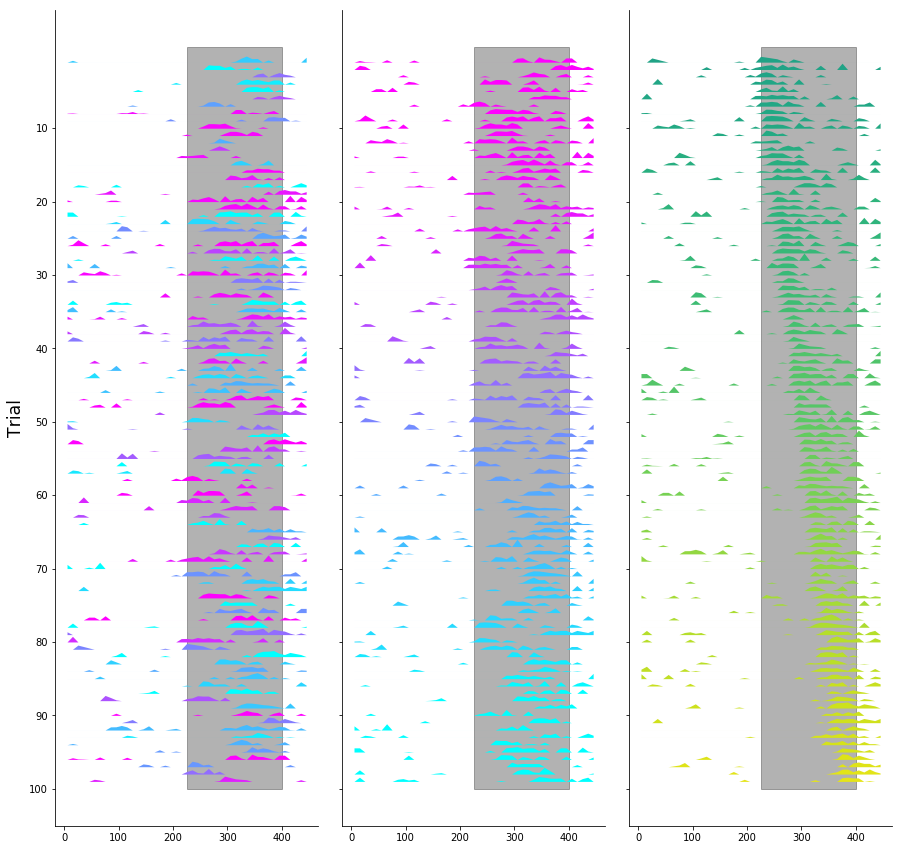

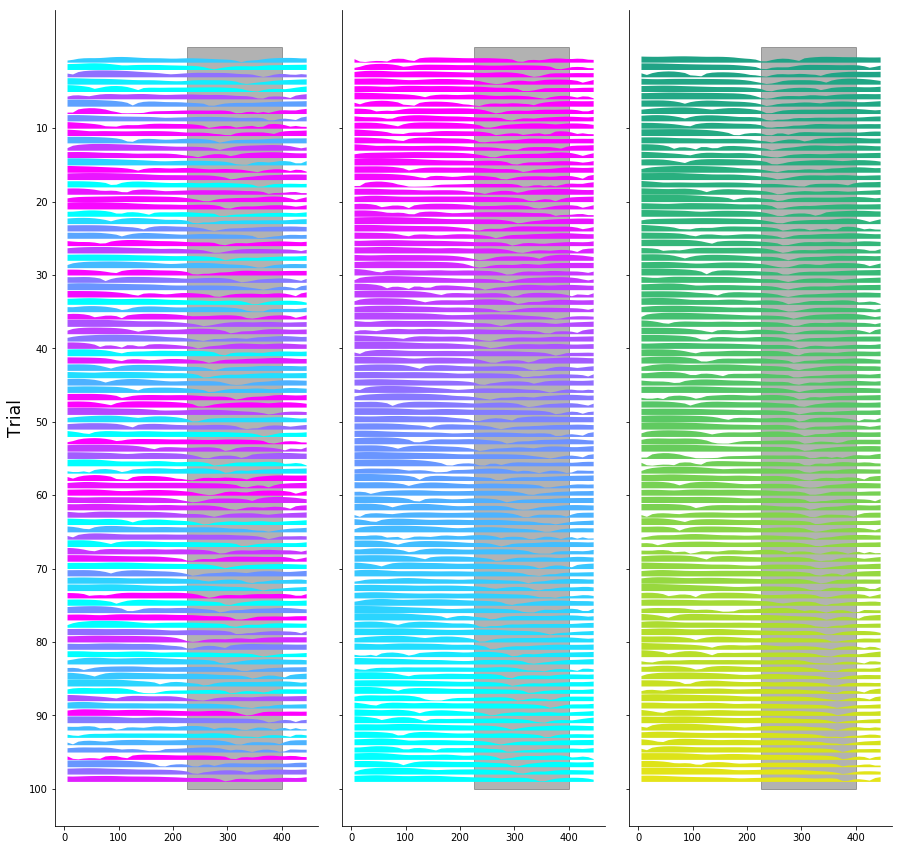

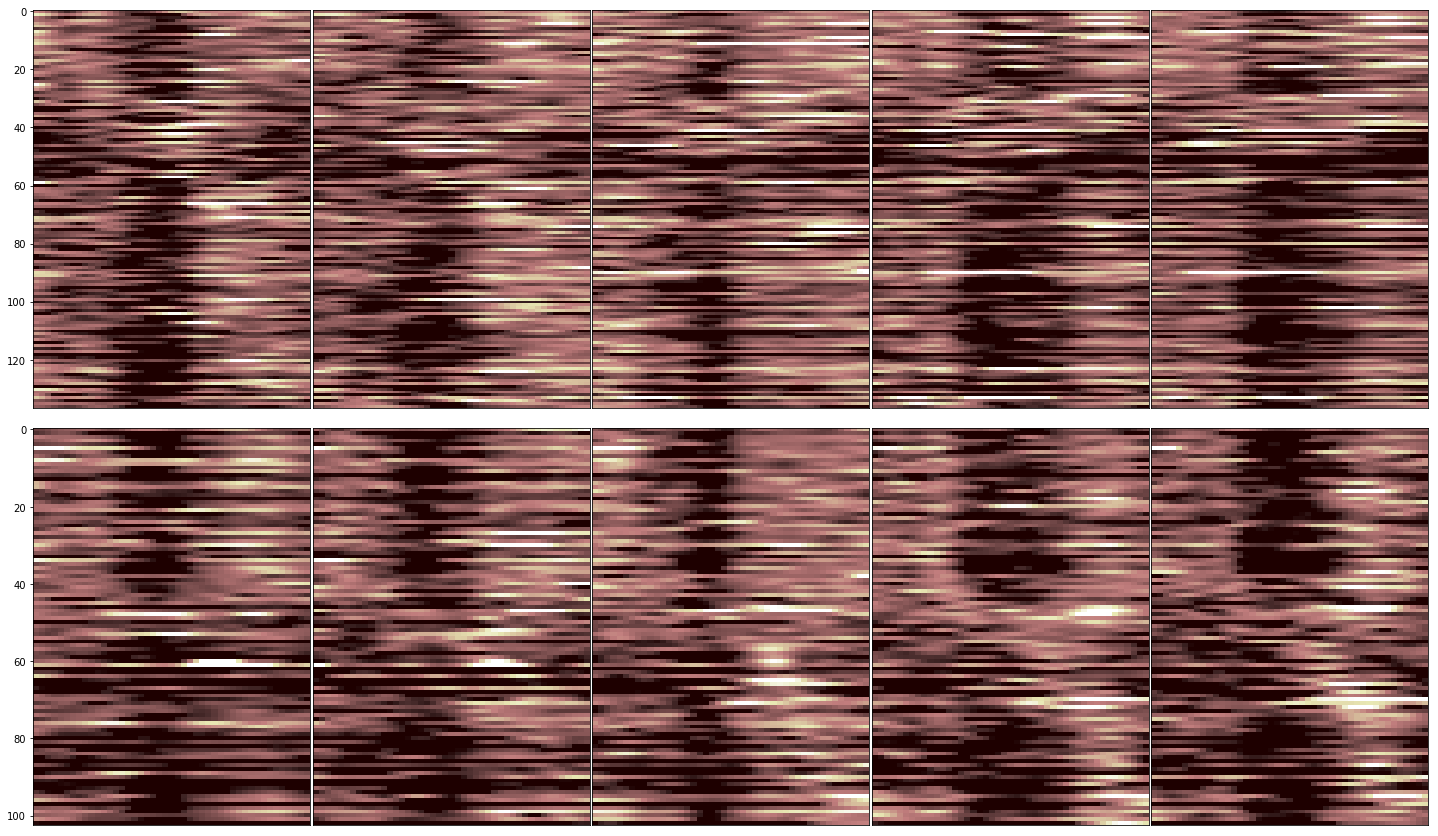

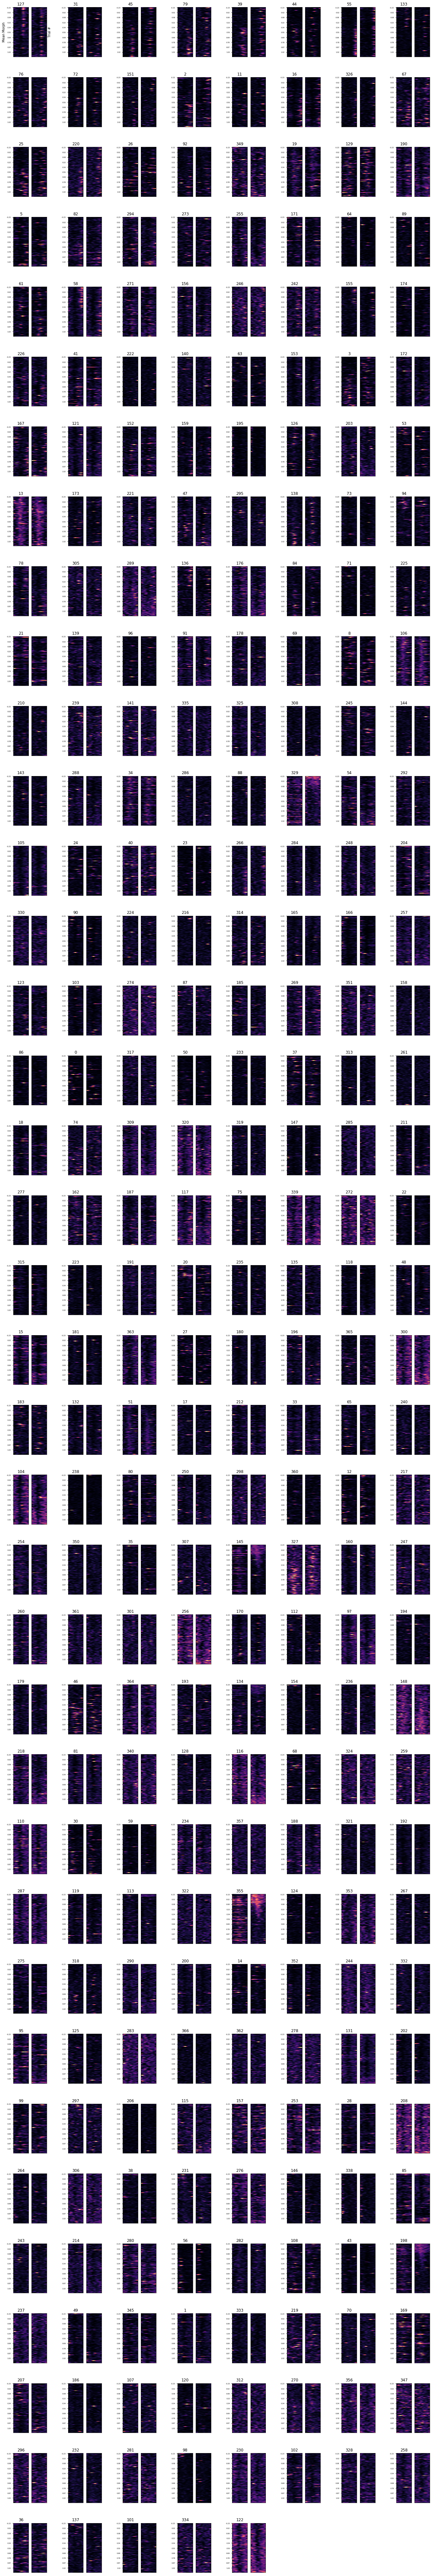

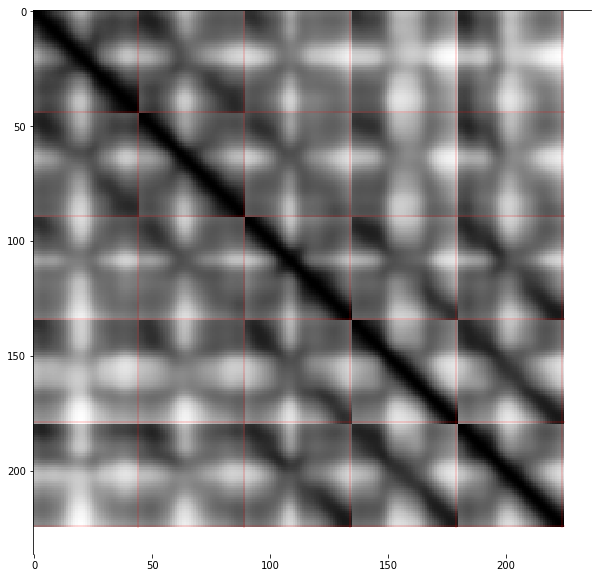

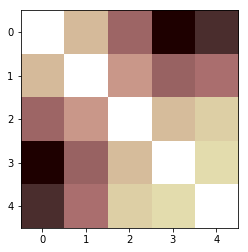

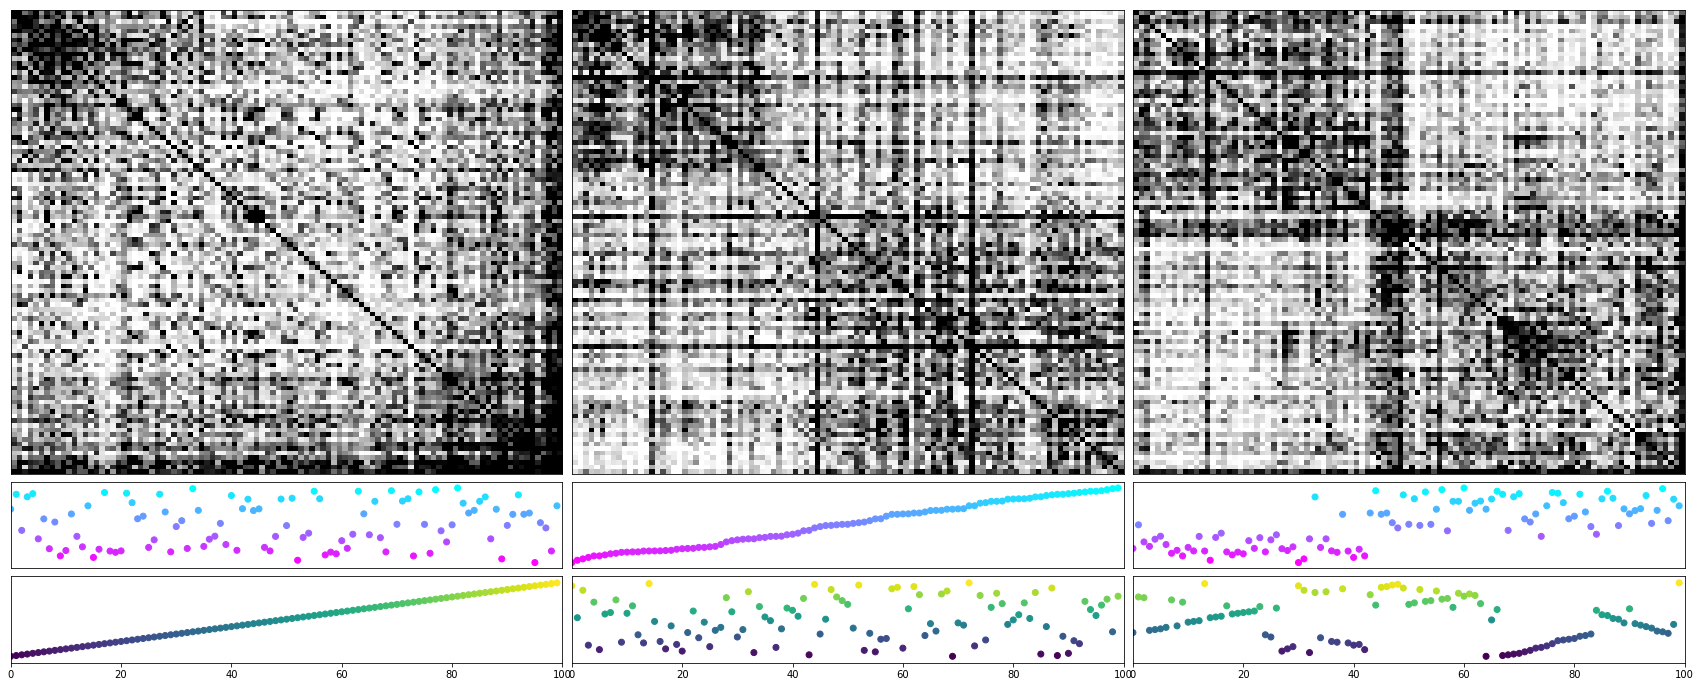

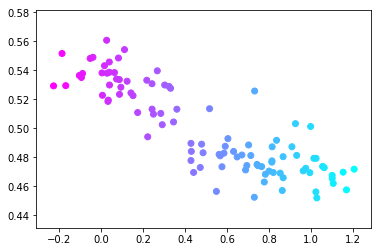

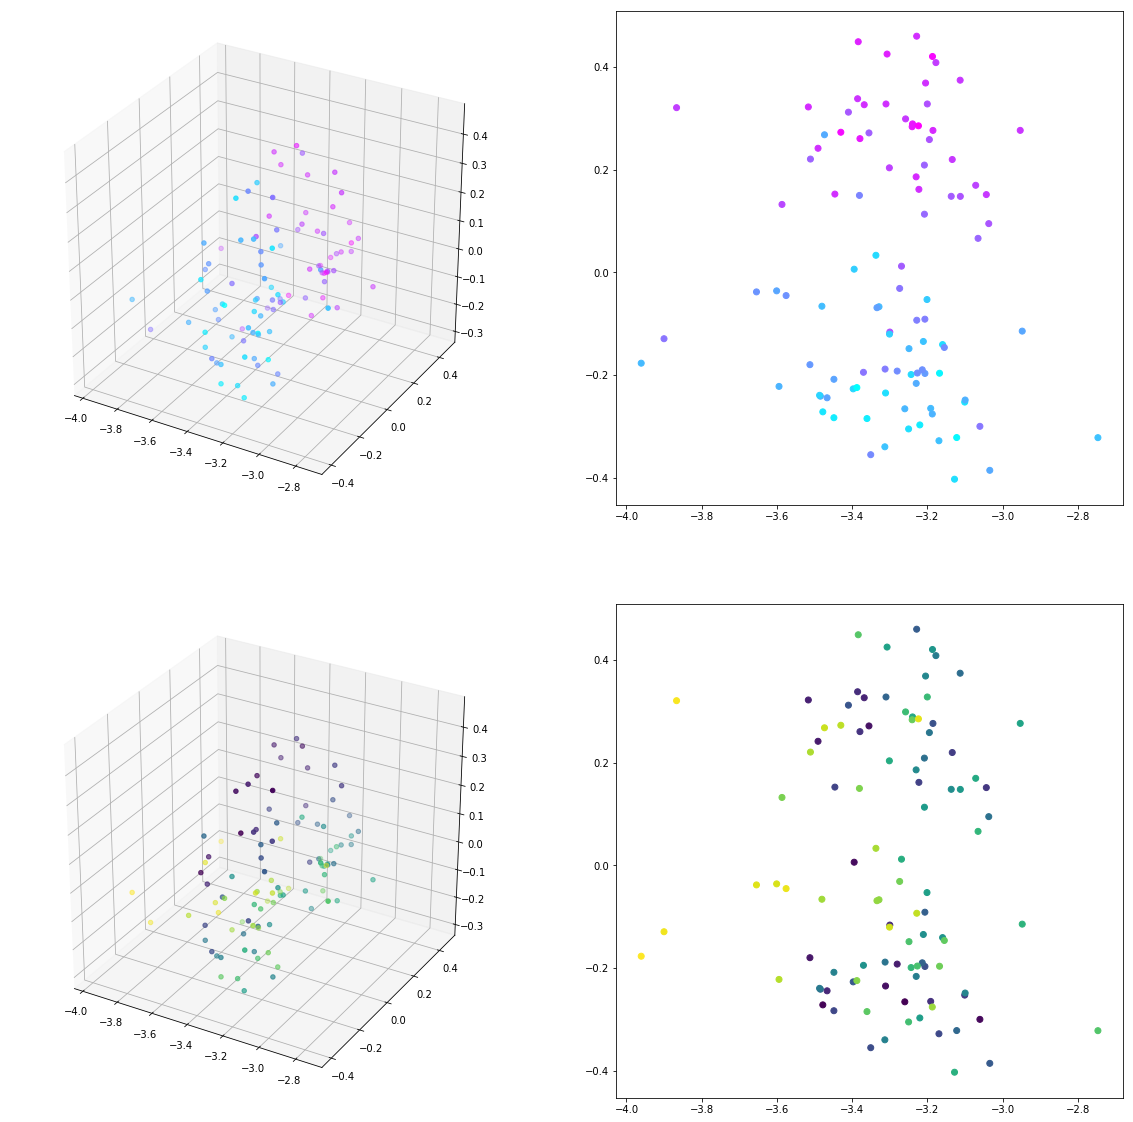

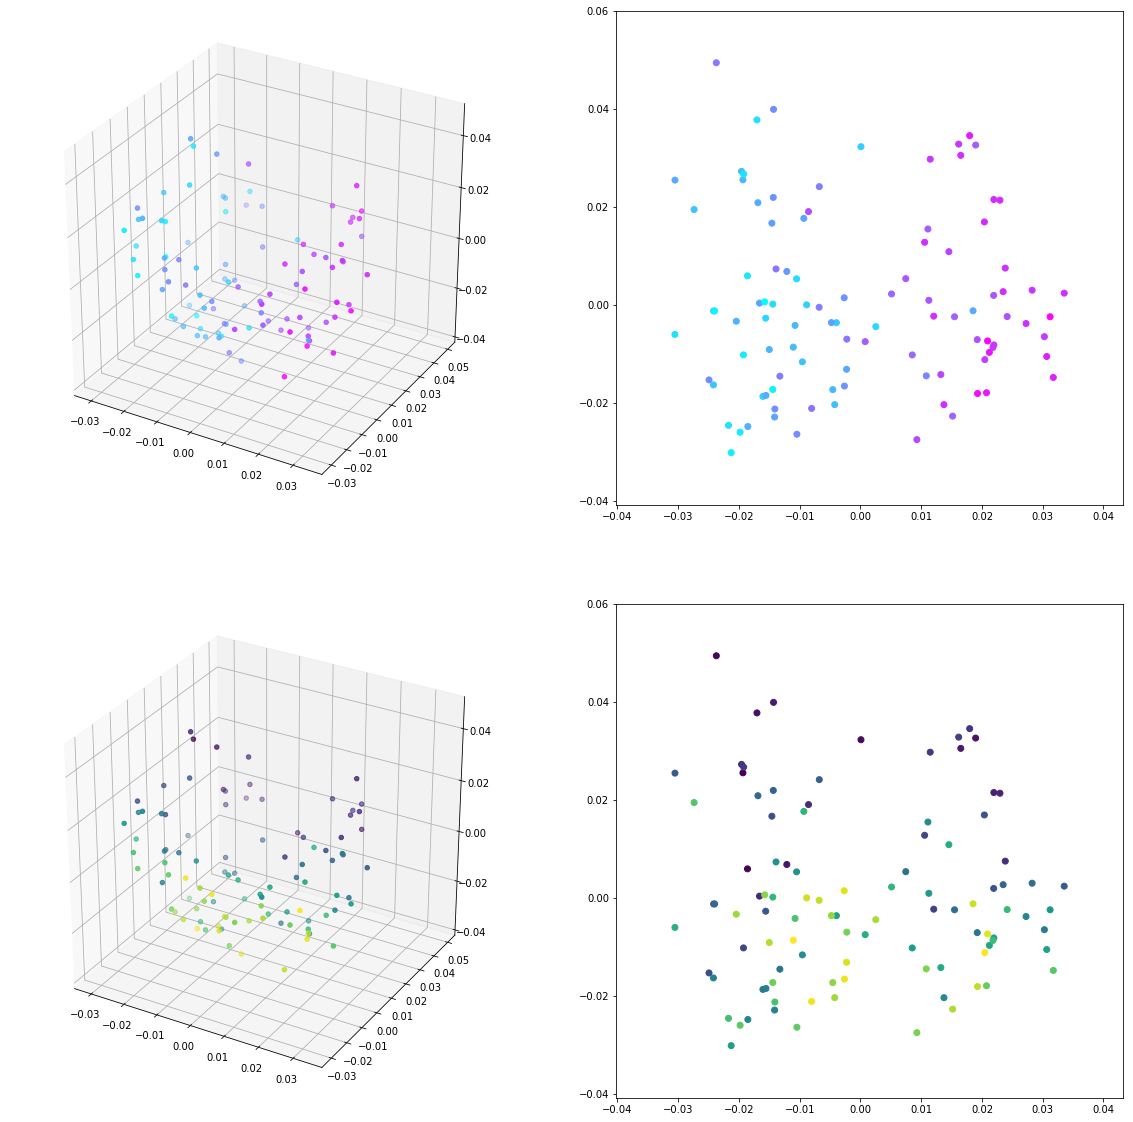

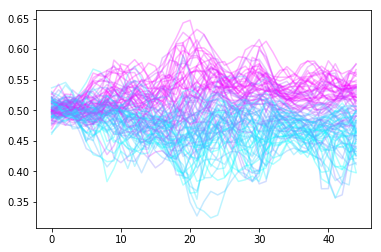

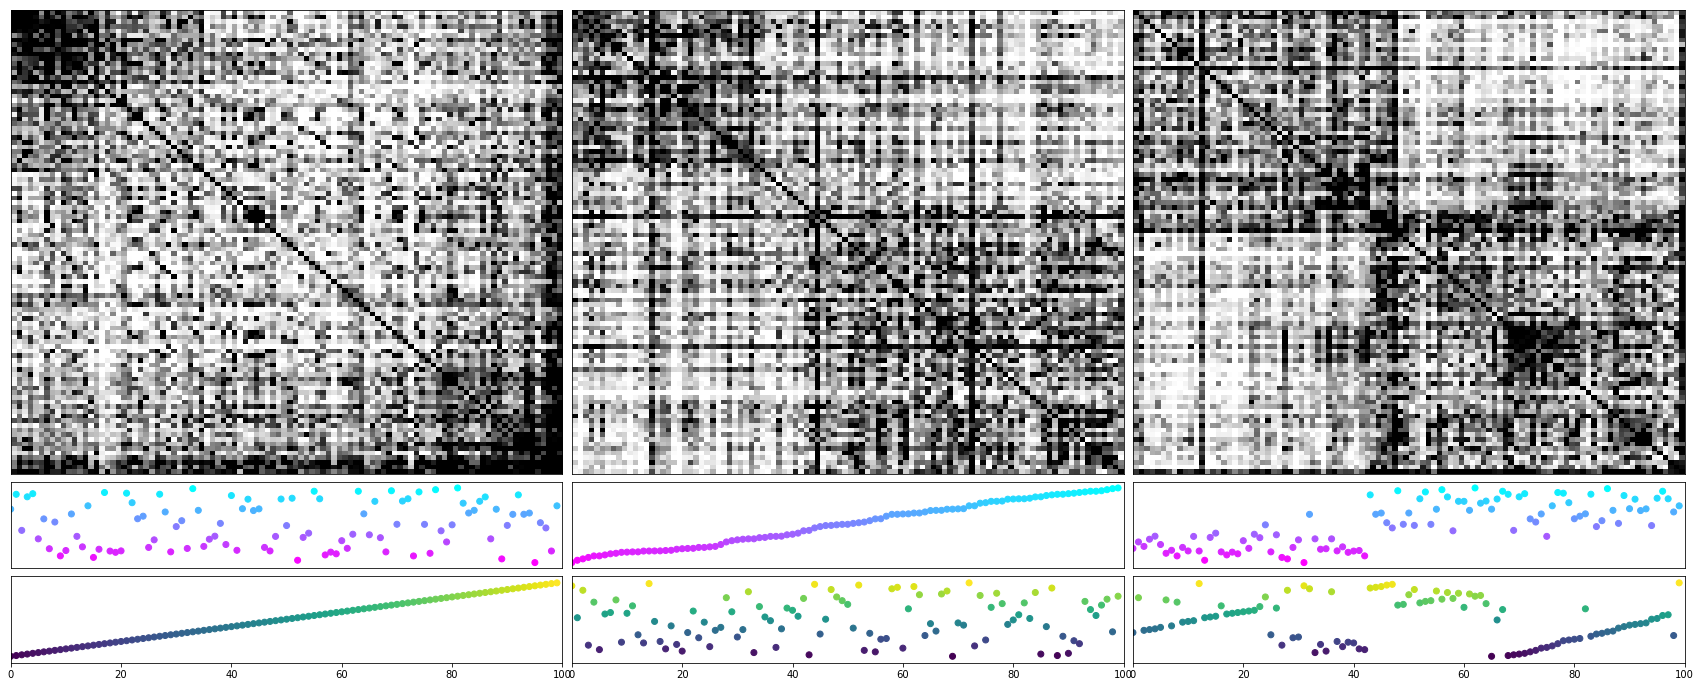

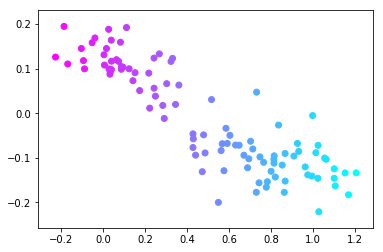

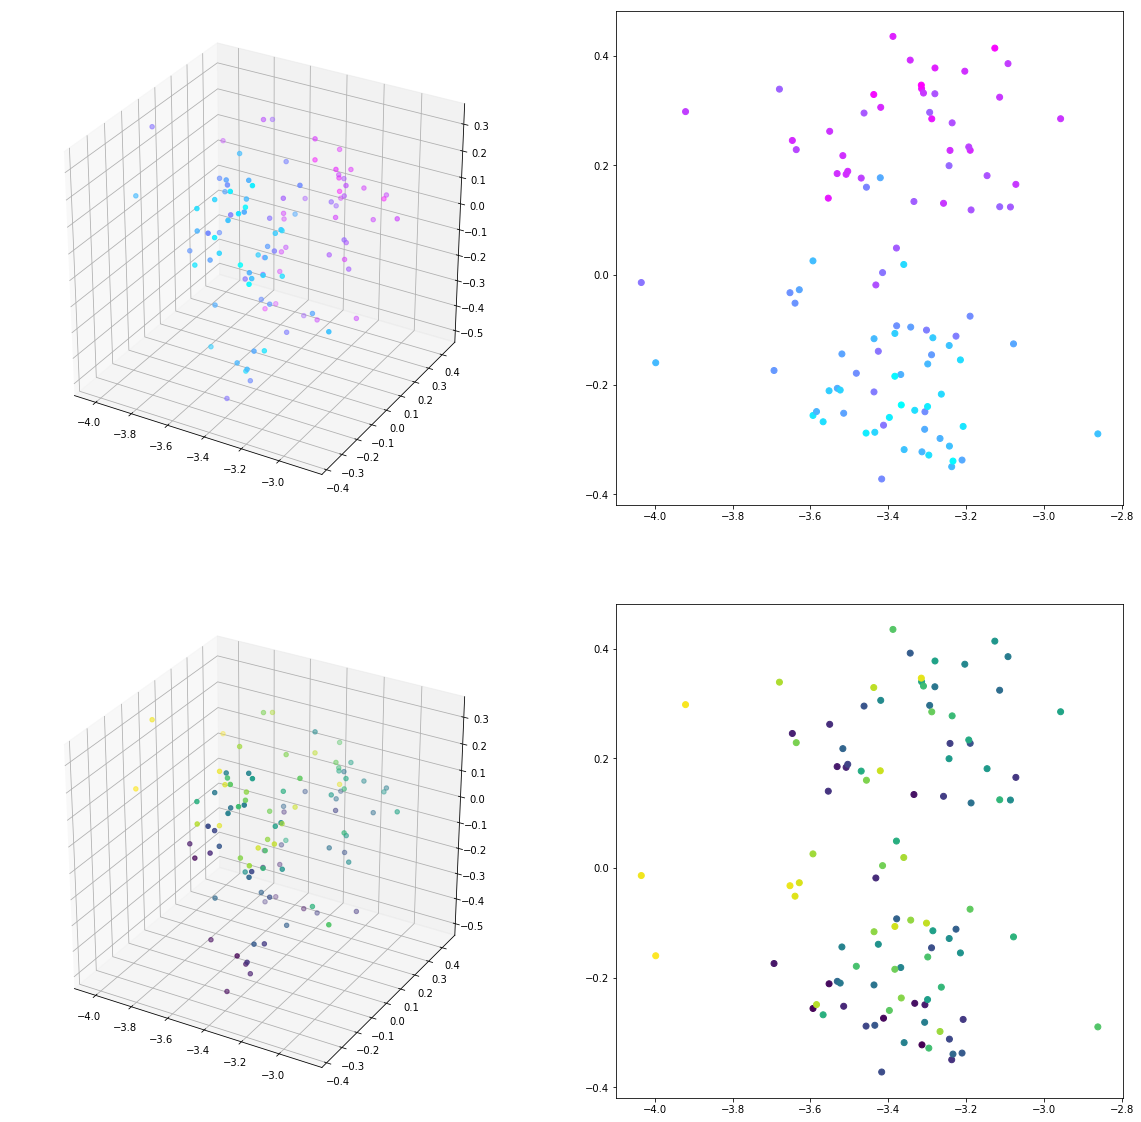

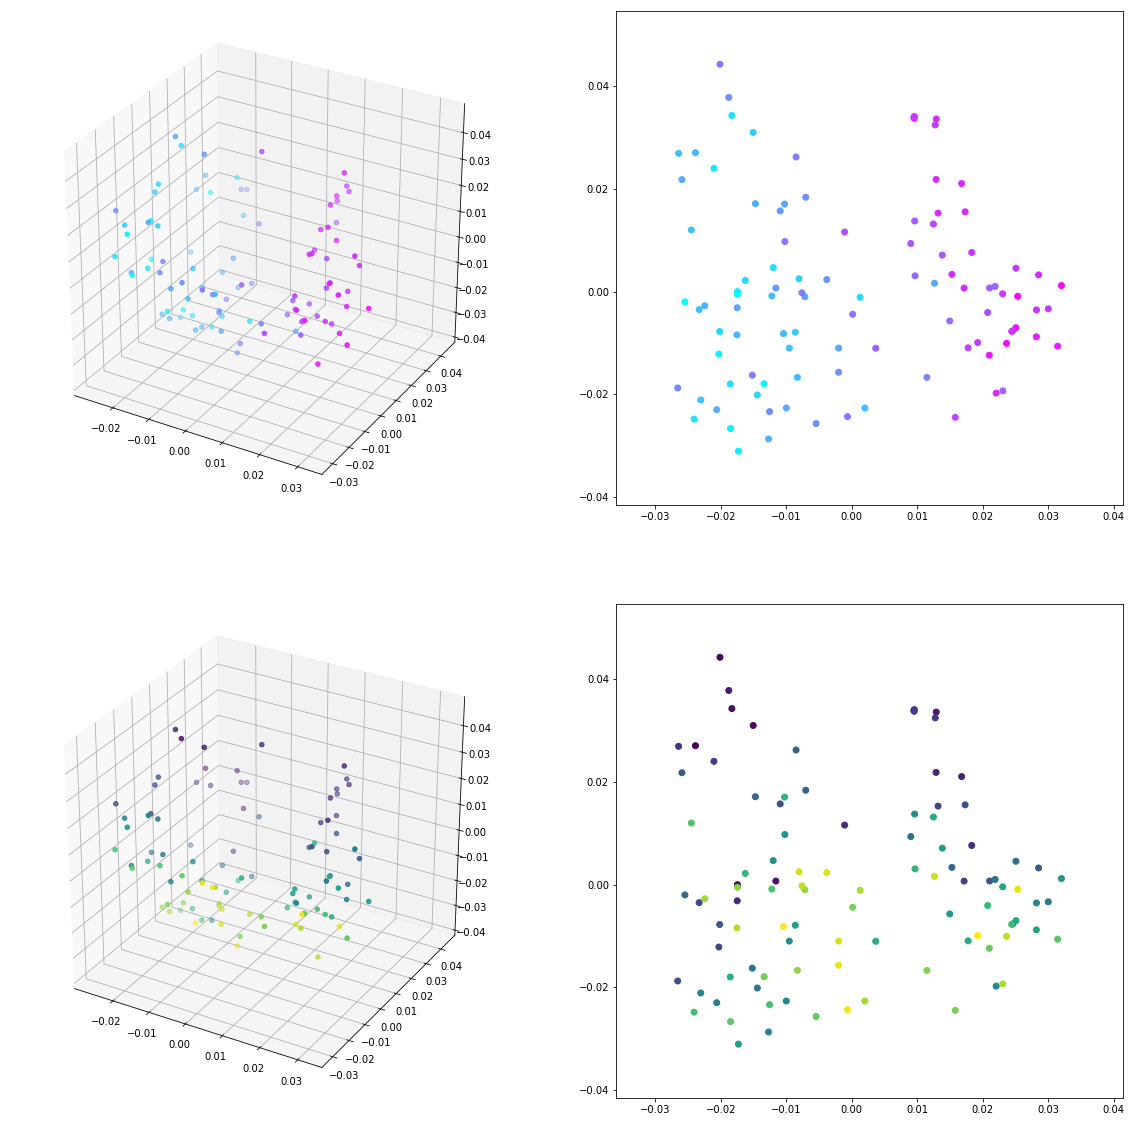

In [79]:
sess=df_mouse.iloc[9]
ssp.single_session_figs(sess,ops=ops,twotower=False)